# Problem Statement

Marketing is essential for the growth and sustainability of any business.

Marketers can help develop the company's brand, attract customers, increase revenue and increase sales. One of the critical points for marketers is knowing their customers and identifying their needs.

By understanding the customer, marketers can launch specialized and targeted campaigns to suit each customer's specifics and needs.

By having the availability of data, referring to customer behavior, tools related to data science can be used in order to meet the specific needs of customers.

In this case study, it will be simulated that a bank in the city of New York wants to carry out a case study by launching a marketing campaign, but not just any campaign, it wants it to be specifically targeted to each type of customer. The main object is to segment them into at least 3 groups.

In the last 6 months the company has collected data regarding its customers, and these will be used for a classification model and to know this segmentation.

The data set contains the following information:

* CUSTID: Identification of the holder of the Credit Card.
* BALANCE: Amount of balance left in your account to make purchases.
* BALANCEFREQUENCY: How often the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated).
PURCHASES: Amount of purchases made from the account.
* ONEOFFPURCHASES: Maximum purchase amount made at one time.
* INSTALLMENT PURCHASES: Amount of the purchase made in installments.
* CASHDVANCE: Cash in advance given by the user.
* FREQUENCY OF PURCHASES: How often Purchases are made, score between 0 and 1 (1 = frequent purchase, 0 = infrequent purchase).
* ONEOFFPURCHASESFREQUENCY - How often to make one-time purchases (1 = frequent purchase, 0 = infrequent purchase).
* FREQUENCY OF INSTALLMENT PURCHASES: Frequency with which installment purchases are made (1 = frequent, 0 = infrequent).
* CASHADVANCEFREQUENCY: How often the cash advance is paid.
* CASHADVANCETRX: Number of Transactions carried out with "Cash in Advanced".
* PURCHASESTRX: Number of purchase transactions made,
* CREDITLIMIT: credit card limit for the user.
* PAYMENTS: Amount of the payment made by the user.
* MINIMUM_PAYMENTS : Minimum amount of payments made by the user.
* PRCFULLPAYMENT: Percentage of the total payment paid by the user.
* TENURE: Tenure of the credit card service for the user.


The data that will be used for this study with open and public domain, are available at the following link.

[Access the data.](https://www.kaggle.com/arjunbhasin2013/ccdata)

# Import Libraries and Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [3]:
creditcard_df = pd.read_csv('./Marketing_data.csv')
creditcard_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


We now know the columns and the data we are dealing with, we can do a quick analysis of the name of the columns, range of the data, understand the characteristics in general.

Analyzing these characteristics may not be enough to finish understanding the data, which is why a deeper analysis of it is made below.

In [3]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
creditcard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


With the last two functions applied to the dataset we can access more specific information about the data, we can analyze the mean, standard deviation, quantiles, etc., of the variables that are numerical.

We can also realize that some columns contain null data, so we have to work with them and make the decision whether to eliminate the clients that contain them or fill that data with some measure of central tendency.

Some important points are:

* Average balance is \$1564.
* Balance frequency is updated quite often, on average ~0.9.
* The average purchase is \$1000.
* The maximum non-recurring purchase amount is on average ~$600.
* The average purchase frequency is close to 0.5.
* Average credit limit is ~\$4,500.
* Full payment percentage is 15%.
* Customers have been in the service for an average of 11 years.

In [5]:
# Analyzing the max purchase
creditcard_df[creditcard_df["ONEOFF_PURCHASES"] == 40761.25]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


The behavior of the movements of this client justifies the amount of purchases he has made.

* The customer still has more than \$11,000 to continue shopping.
* His maximum purchase was $40761.25, a high purchase.
* Has a high frequency of purchases (1).
* You have made 101 purchases and only 1 purchase asking for cash in advance from the bank.
* Has a credit limit of \$22,500.


In general, this client buys very frequently, is a loyal person to the bank, uses the services very frequently, so creating a marketing campaign for this type of client may not be necessary if the objective is to encourage them to buy. One focused on using cash up front might work better.

Let's analyze the other side of the coin, that customer whose purchases are made with cash in advance.

In [6]:
creditcard_df[creditcard_df['CASH_ADVANCE'] > 47000]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


This client has the following characteristics:

* It has a high balance to make purchases.
* Its balance is constantly updated.
* Its purchases with cash in advance are greater than direct purchases.
* It has a high credit limit.

# Exploratory data analysis

## Null and duplicate data cleaning

### Null data

Before starting to train the Machine Learning model, it is necessary to verify if the data has null data. To do this, the following visualization is performed to verify it.

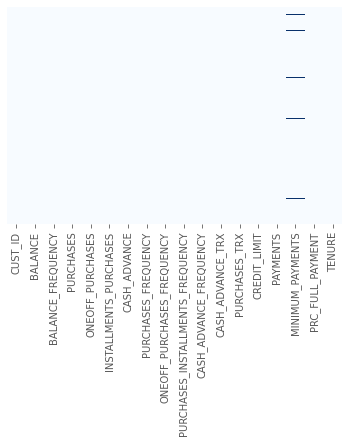

In [7]:
sns.heatmap(creditcard_df.isnull(), yticklabels=False, cbar=False, cmap='Blues')
plt.show()

The visualization helps us understand that the MINIMUM_PAYMENTS column has missing data. Another way to check it is as follows.

In [8]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

It is important to carry out the previous operation since it gives us the most detailed information of the missing data. In the visualization it is not possible to appreciate that the CREDIT_LIMIT column also has missing data, only 1, which also has to be worked on.

For this case study, the missing data will be filled in with the mean of the corresponding column.

In [6]:
# Removing the missing ones for the MINIMUM PAYMENTS column
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()

# Removing the missing ones for the CREDIT_LIMIT column
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()

# Checking for missing data
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

### Duplicated data

Another important process when analyzing the data is if we have duplicate data.

In [4]:
duplicates = creditcard_df.duplicated().sum()

print('Duplicated data: {}'.format(duplicates))

Duplicated data: 0


In this case we do not have duplicate data.

## Cleaning of unnecessary data

The CUST_ID column is not necessary for modeling, so we proceed to eliminate it, in order not to continue working with it.

In [7]:
creditcard_df.drop('CUST_ID', axis=1, inplace=True)
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Removing the CUST_ID column leaves us with 17 to work on.

## Data Visualization

### Histograms and KDE Density

A useful way to look at the density of a variable is with a KDE chart, which helps us visualize the probability density of a continuous variable.

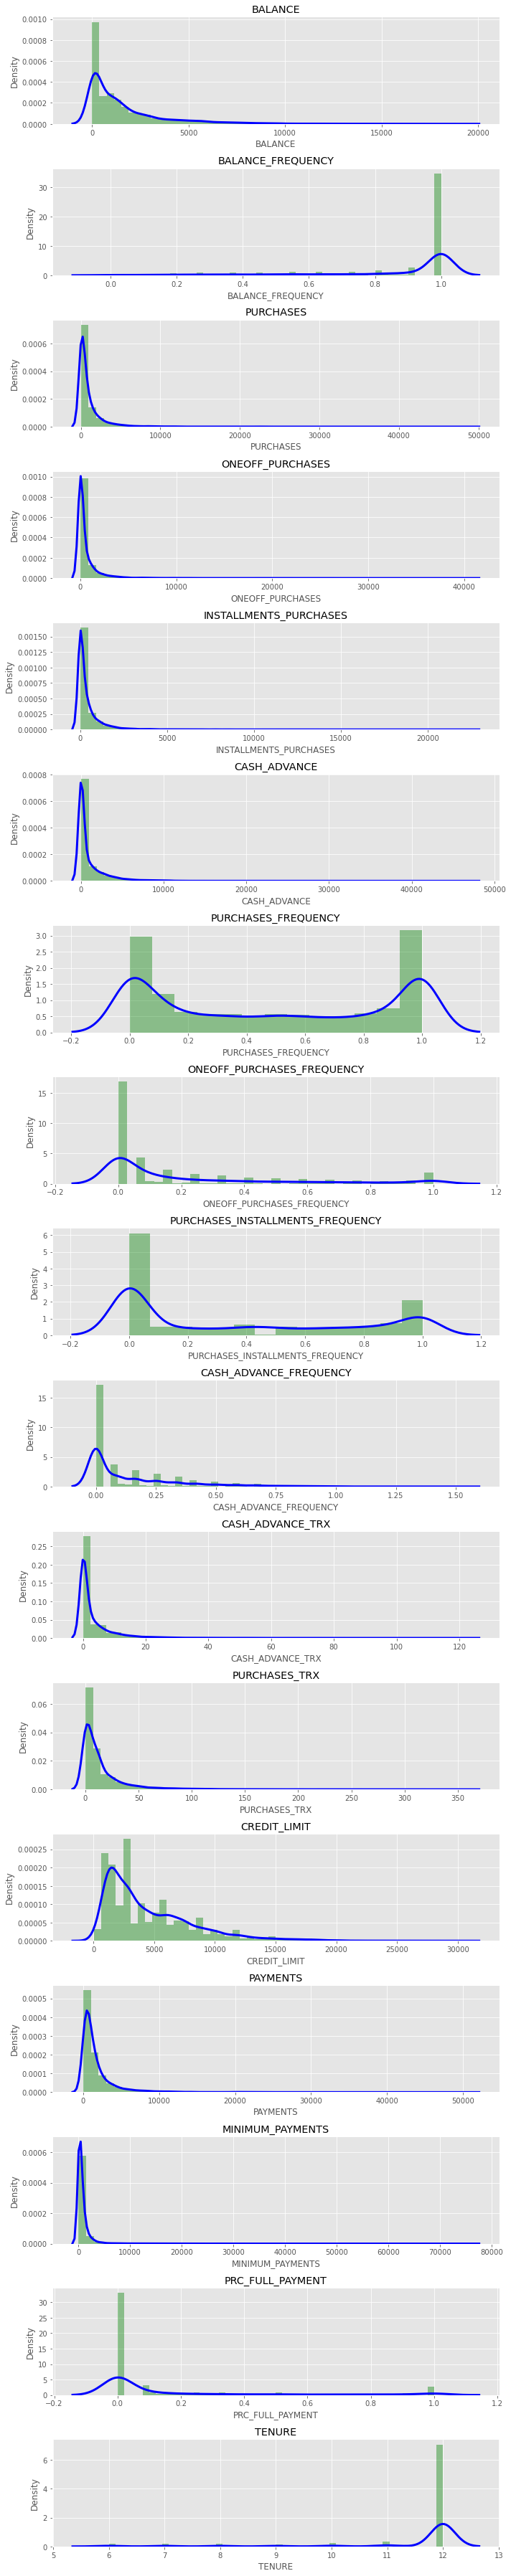

In [13]:
plt.figure(figsize = (10, 50))
for i in range(len(creditcard_df.columns)):
    plt.subplot(len(creditcard_df.columns), 1, i+1)
    sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws = {"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
    plt.title(creditcard_df.columns[i])

plt.tight_layout()
plt.show()

* Average balance is $1,500.
* 'Balance_Frequency' for many users is updated very frequently ~ 1.
* For the 'PURCHASES_FREQUENCY' field, there are two different groups of customers.
* For the 'ONEOFF_PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY' fields, the vast majority of users do not pay everything at once or in installments.
* Very few customers pay their debt in full 'PRC_FULL_PAYMENT' ~ 0.
* The average credit limit is around \$4,500.
* Most customers have been using the service for ~11 years.

### Correlation matrix

We need to understand how the variables are correlated, this helps us find possible trends in the data. 

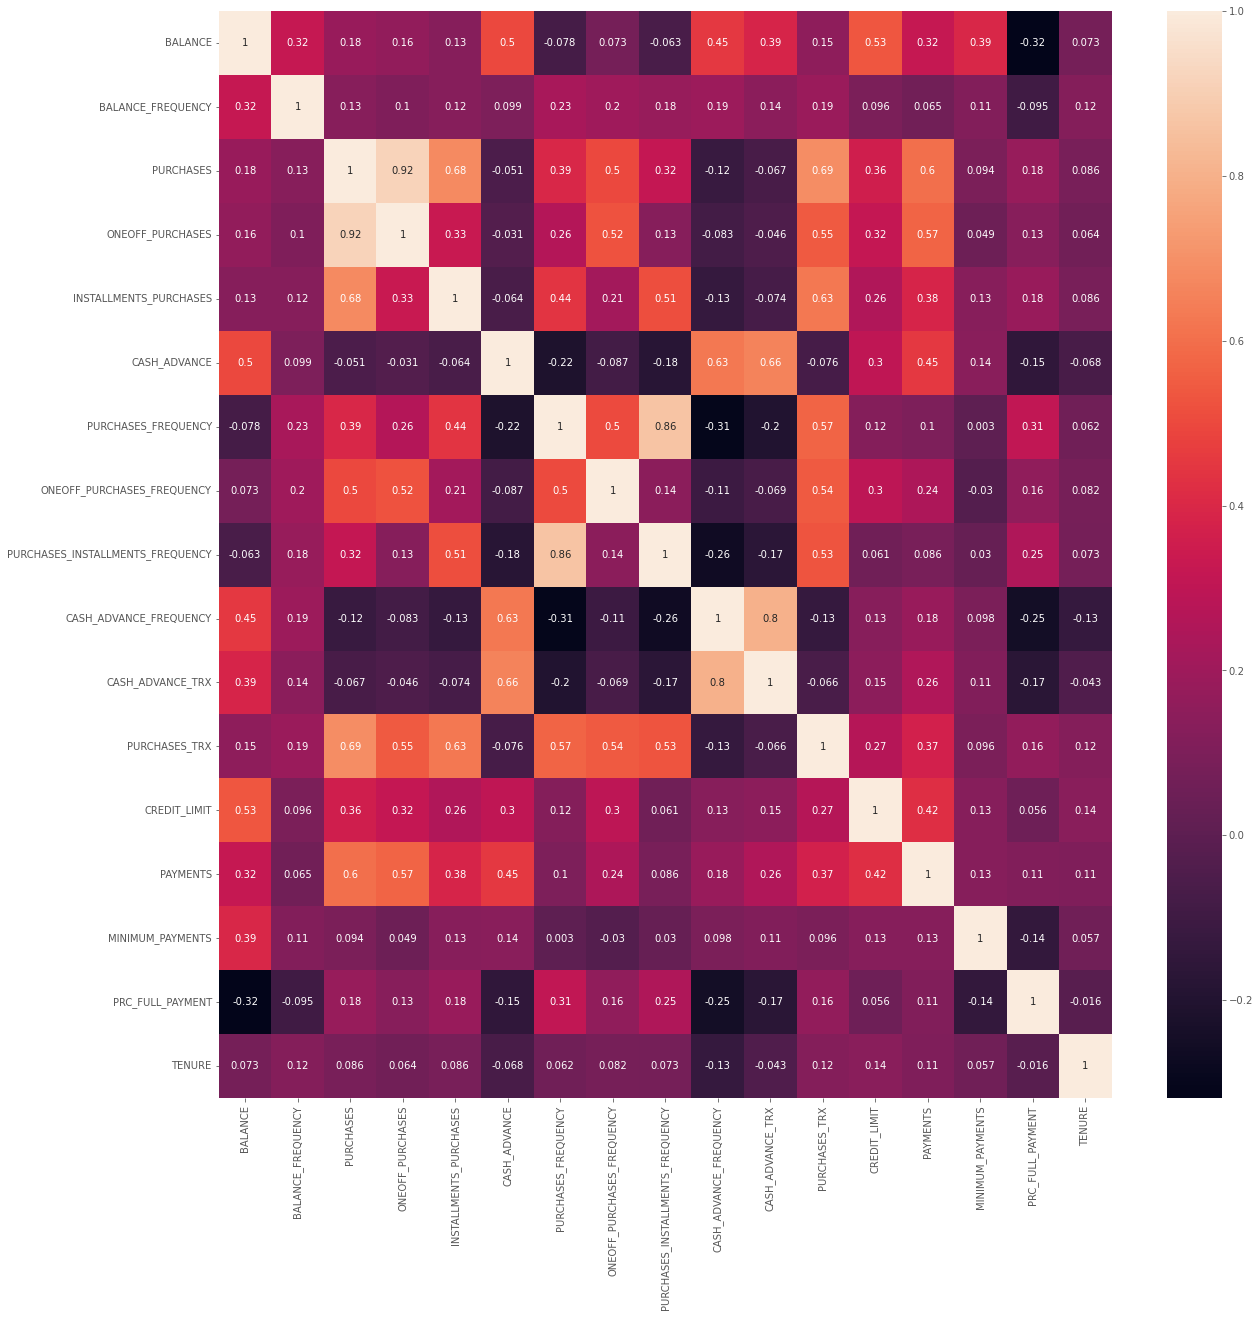

In [14]:
correlations = creditcard_df.corr()

f, ax, = plt.subplots(figsize=(20,20))
sns.heatmap(correlations, annot=True)
plt.show()

* There is correlation between 'PURCHASES' and ONEOFF_PURCHASES & INSTALMENT_PURCHASES
* A trend is seen between 'PURCHASES' and 'CREDIT_LIMIT' & 'PAYMENTS'
* 'PURCHASES' have a high correlation with ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, PURCHASES_TRX, CREDIT_LIMIT, and PAYMENTS.
* Very high positive correlation between 'PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY'

# Training Model

## K-Means

Before starting to model, it is necessary to scale the data, this to prevent variables with a larger range from dominating versus others with smaller domains.

In [8]:
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

### Optimal number of centroids (Elbow method).

When applying a K-Means model, it is necessary to find the optimal number of clusters in which the data is going to be divided, there is no mathematical formula to process this data, so far, the best way to do it is with the visualization of the elbow method. This method takes as a scoop the intra-cluster variance between the centroid and the data that compose it. At a large number of k (centroids), less variance. The elbow method, visualizing this variance, takes as optimal k the one whose difference between k and k + 1 no longer improves considerably.

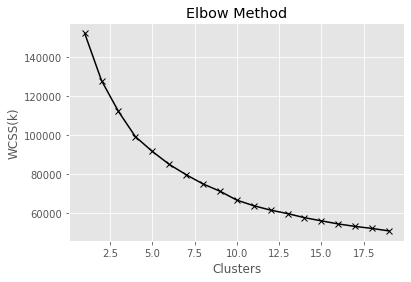

In [9]:
# Find optimal K
scores_1 = []
range_values = range(1,20)

for i in range_values:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(creditcard_df_scaled)
  scores_1.append(kmeans.inertia_)

# Visualize to choose the optimal K
plt.plot(range_values, scores_1, 'kx-')
plt.title('Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('WCSS(k)')
plt.show()

With the graph we can see that in 4 clusters is where the elbow of the curve is formed. However, the values do not reduce to a linear form until the 8th cluster. Let us choose a number of clusters equal to 8.

### Training

In [17]:
k = 8

kmeans = KMeans(n_clusters=k)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

Cluster centers are those centroids that help separate data into different segments. To visualize them we include them in a Dataframe.

In [18]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.901817,0.466986,2.270963,1.756936,2.141920,-0.195512,1.158629,1.583889,1.226198,-0.312181,-0.212097,2.781452,1.238947,1.290295,0.441655,0.304778,0.334182
1,0.019493,0.403153,-0.361863,-0.246971,-0.401779,-0.086621,-0.867503,-0.410513,-0.758672,0.115631,-0.020700,-0.486861,-0.305126,-0.248169,-0.008412,-0.456474,0.271801
2,1.698325,0.393098,-0.215463,-0.154529,-0.225632,2.025668,-0.471452,-0.210500,-0.409161,1.920837,1.941432,-0.263115,1.040171,0.828342,0.557352,-0.392330,0.071341
3,1.923051,0.337717,11.212042,10.600367,7.033118,0.419625,1.046983,1.915501,0.981334,-0.258912,0.061229,5.362438,3.044064,8.098975,1.120318,1.110132,0.310863
4,-0.701229,-2.144116,-0.311099,-0.235720,-0.302414,-0.321905,-0.556586,-0.444989,-0.439730,-0.520844,-0.376103,-0.419790,-0.177161,-0.202048,-0.256658,0.281550,0.199199
5,-0.336050,-0.347078,-0.289267,-0.215966,-0.286835,0.068284,-0.203078,-0.288661,-0.224549,0.308663,0.000996,-0.388117,-0.567159,-0.392680,-0.209145,0.014011,-3.203733
6,-0.165253,0.392196,0.453349,0.593167,-0.017967,-0.333914,0.943302,1.878357,0.089014,-0.407665,-0.323378,0.523732,0.373578,0.086557,-0.162605,0.406347,0.261047
7,-0.364778,0.333613,-0.037381,-0.244339,0.360316,-0.363589,0.990669,-0.387079,1.206081,-0.475238,-0.361153,0.187666,-0.260925,-0.216886,-0.032660,0.313849,0.257637


The above data is scaled, so it's hard to really understand what it means. For this, we will apply the inverse transformation of the scaling to obtain the real values and thus be able to analyze more clearly and adequately.

In [19]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3441.530986,0.987896,5855.151608,3508.591111,2347.978936,568.874079,0.955365,0.674962,0.851760,0.072674,1.801418,83.846336,9002.245863,5468.421612,1893.464949,0.242857,11.964539
1,1605.047605,0.972774,230.077907,182.515426,47.744156,797.223294,0.142179,0.079994,0.062922,0.158283,3.107562,2.608297,3384.275575,1014.718178,844.603245,0.020204,11.881057
2,5099.393953,0.970392,542.864477,335.950907,207.031791,5226.790667,0.301134,0.139661,0.201826,0.519523,16.497674,8.169767,8279.016913,4131.114001,2163.092995,0.038965,11.612791
3,5567.142164,0.957273,24957.905000,18186.875667,6771.029333,1858.844605,0.910556,0.773889,0.754444,0.083333,3.666667,148.000000,15570.000000,25178.882690,3475.059479,0.478409,11.933333
4,104.925267,0.369349,338.537483,201.190254,137.598754,303.821813,0.266966,0.069709,0.189677,0.030918,0.682203,4.275424,3849.863936,1148.234177,266.075424,0.236063,11.783898
5,865.015978,0.795051,385.181720,233.977974,151.686061,1122.064941,0.408846,0.116344,0.275196,0.196911,3.255627,5.062701,2430.891398,596.373827,376.802926,0.157813,7.229904
6,1220.514994,0.970178,1971.792676,1576.972447,394.820228,278.637458,0.868943,0.762808,0.399814,0.053566,1.042009,27.727854,5853.677875,1983.717894,485.262318,0.272564,11.866667
7,805.220083,0.956301,923.338824,186.885283,736.896637,216.408238,0.887954,0.086985,0.843765,0.040044,0.784226,19.374504,3545.099307,1105.280930,788.094852,0.245510,11.862103


Let's analyze the most relevant clusters.

* Second Cluster of Customers: These are customers who use the service very little, have a purchase frequency of just 0.14, although they have a balance of $1,605, so they are considered as those customers who save.
* Fourth Cluster of Clients: They have a balance greater than the average, but without being very high, high purchase frequency, their purchases in a single transaction are high, and they also use credit frequently.
* Sixth cluster of Clients: They are those whose level of purchase is the highest, their maximum purchase amount at one time is the highest. That is, those customers with a greater flow of purchases. Therefore, those who pay the most taxes.
* Seventh cluster of Clients: They are those who contribute more cash, that is, they do not ask for it in advance from the bank, so their transactions with Cash in Advance are low.
* Eighth cluster of Clients: These are clients that are similar to the previous ones, only that they buy less and their account balance is not very high.

Now we can add to the original dataset to which cluster each client corresponds.

In [20]:
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster': labels})], axis = 1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,6
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


Visualizing the histogram of each variable with respect to the clusters.

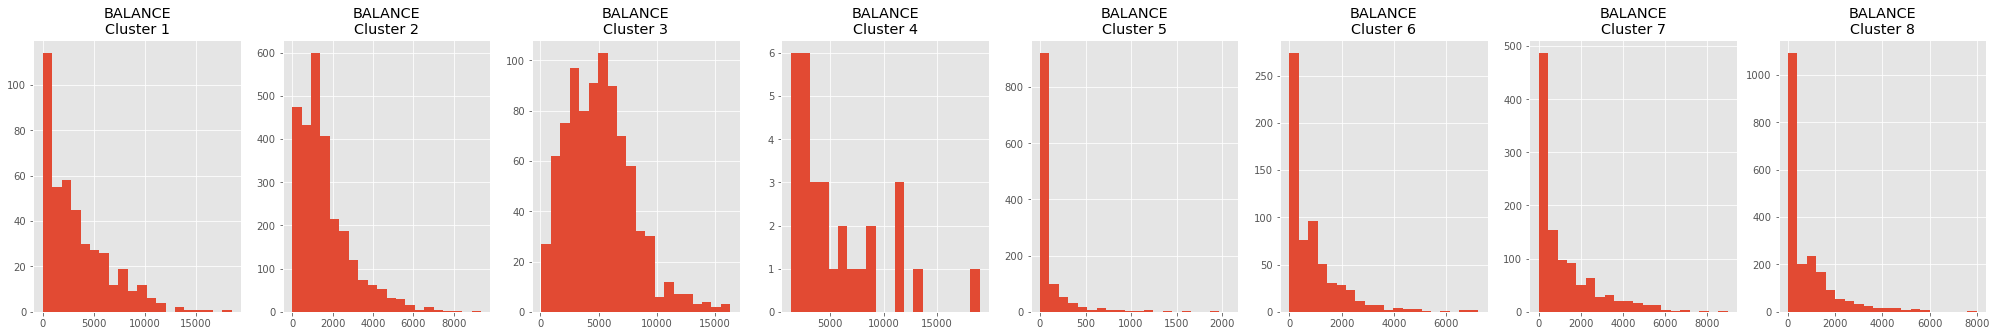

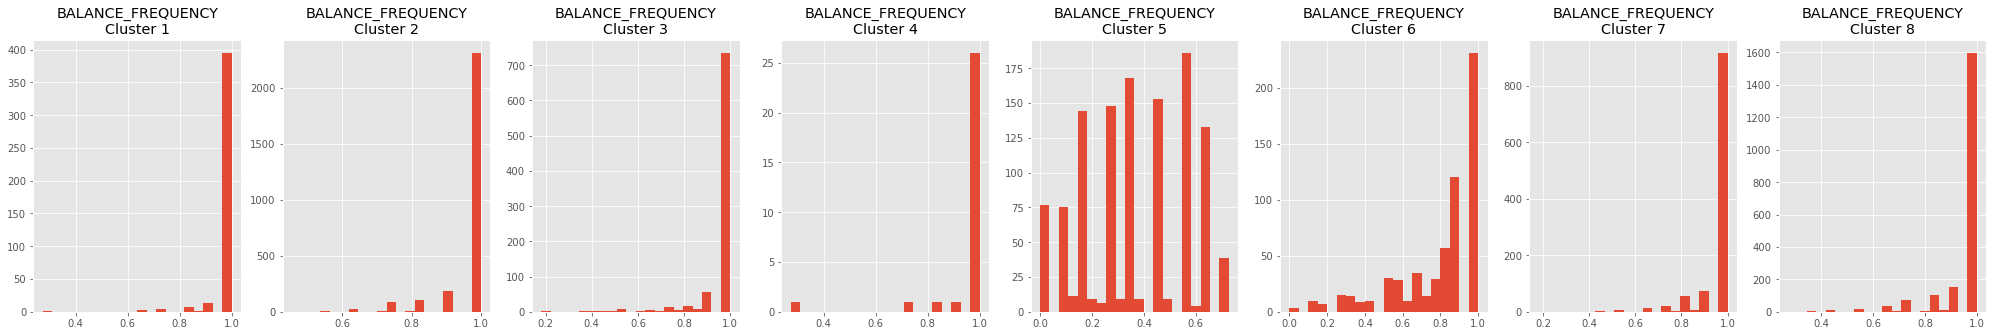

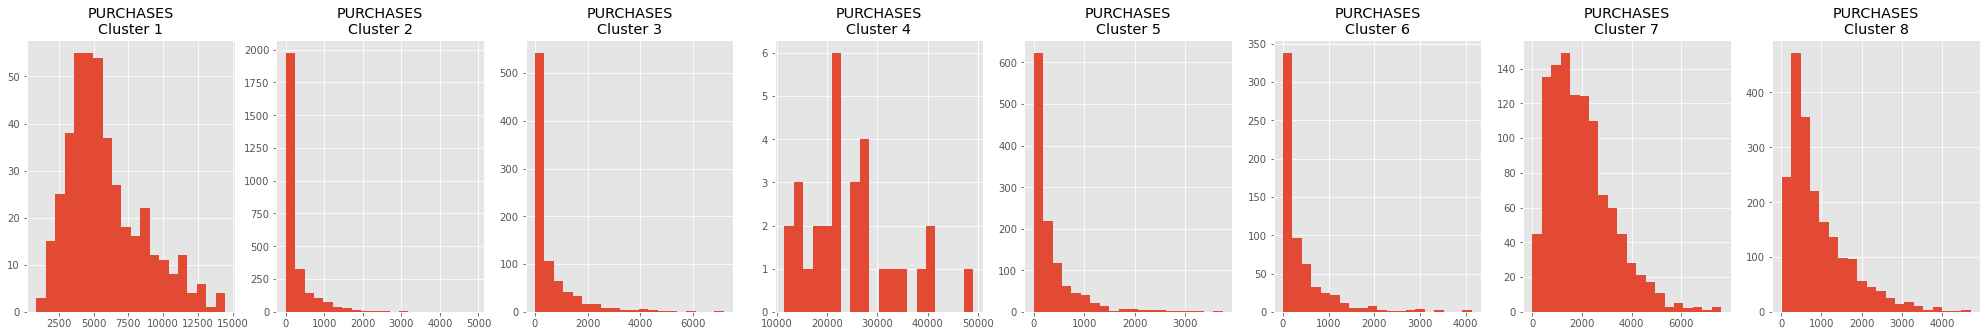

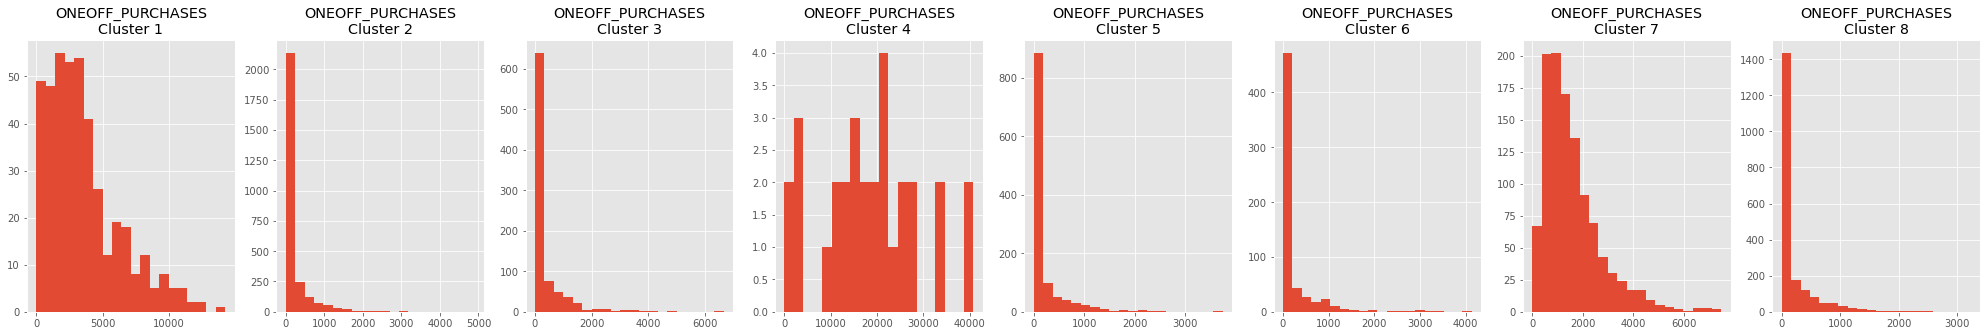

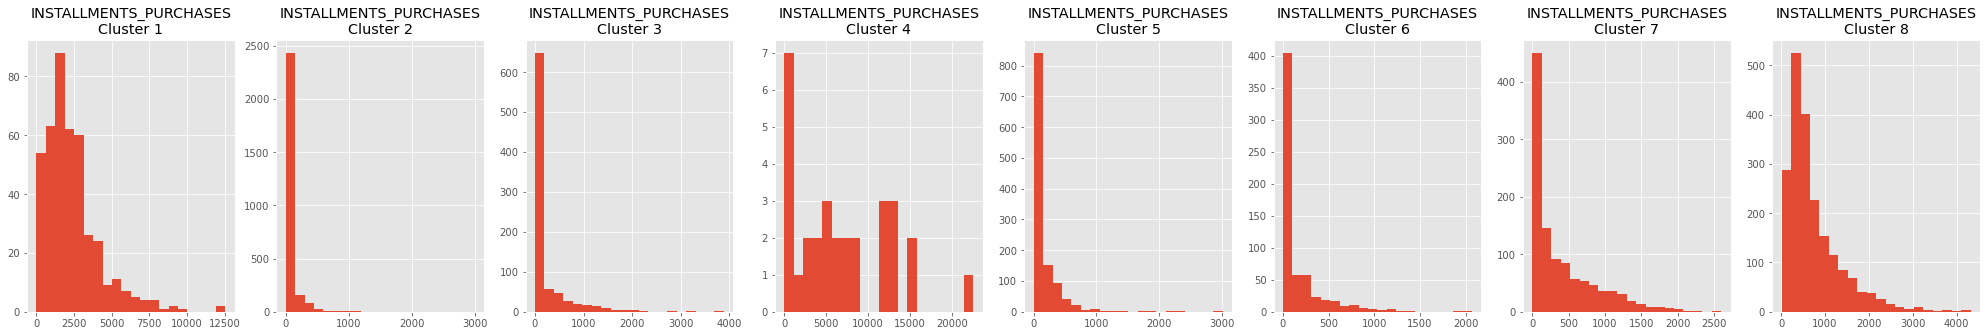

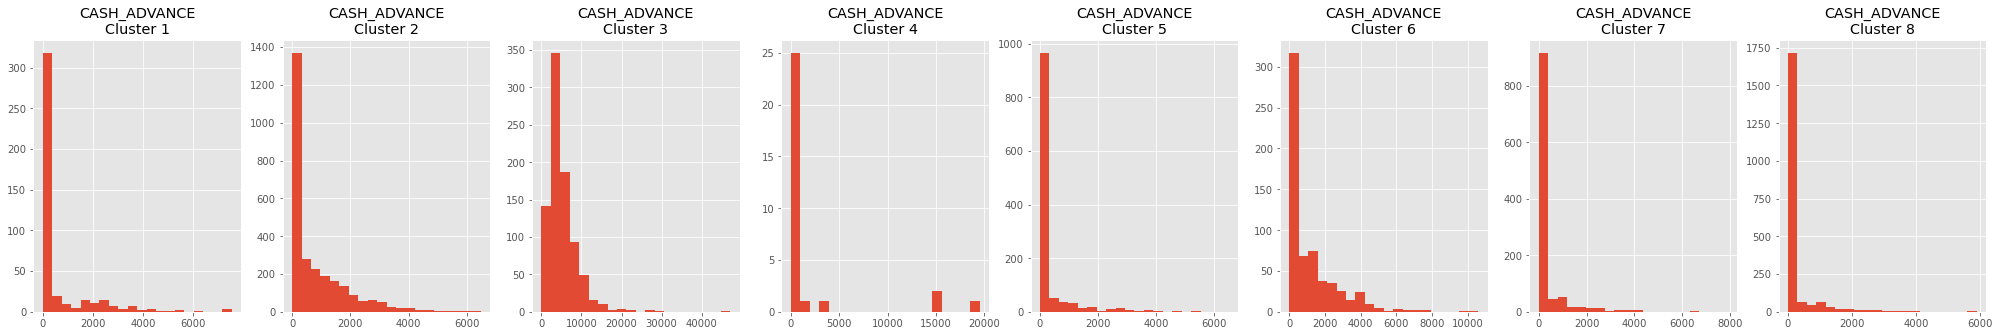

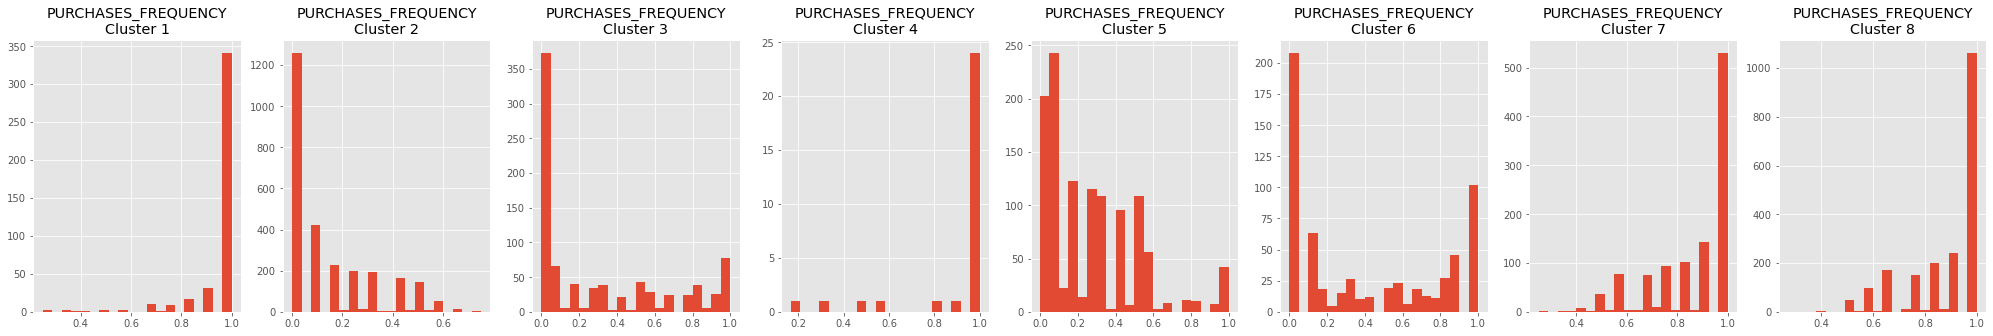

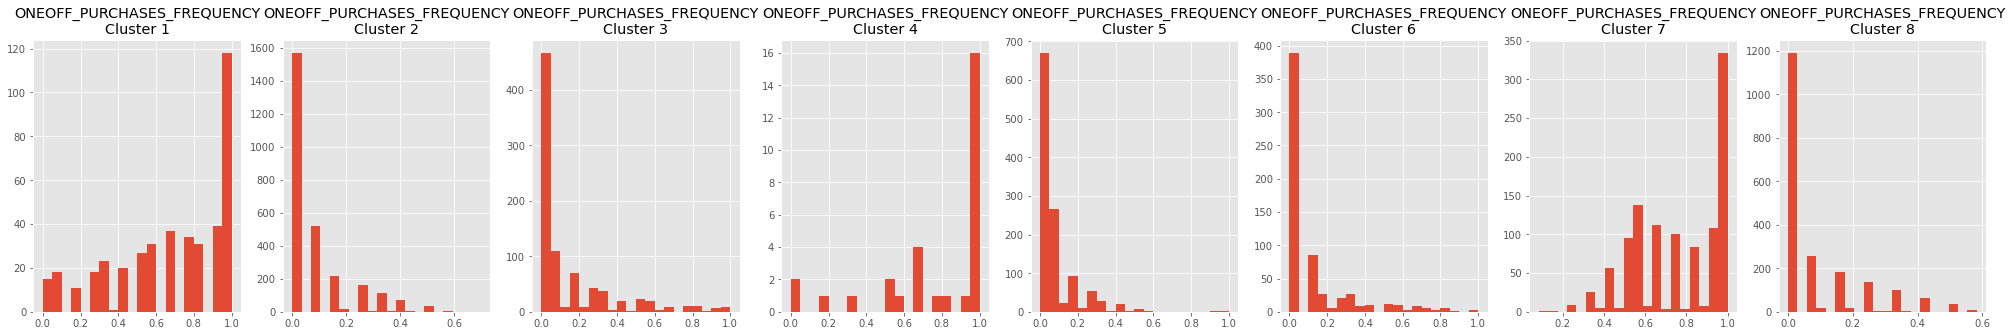

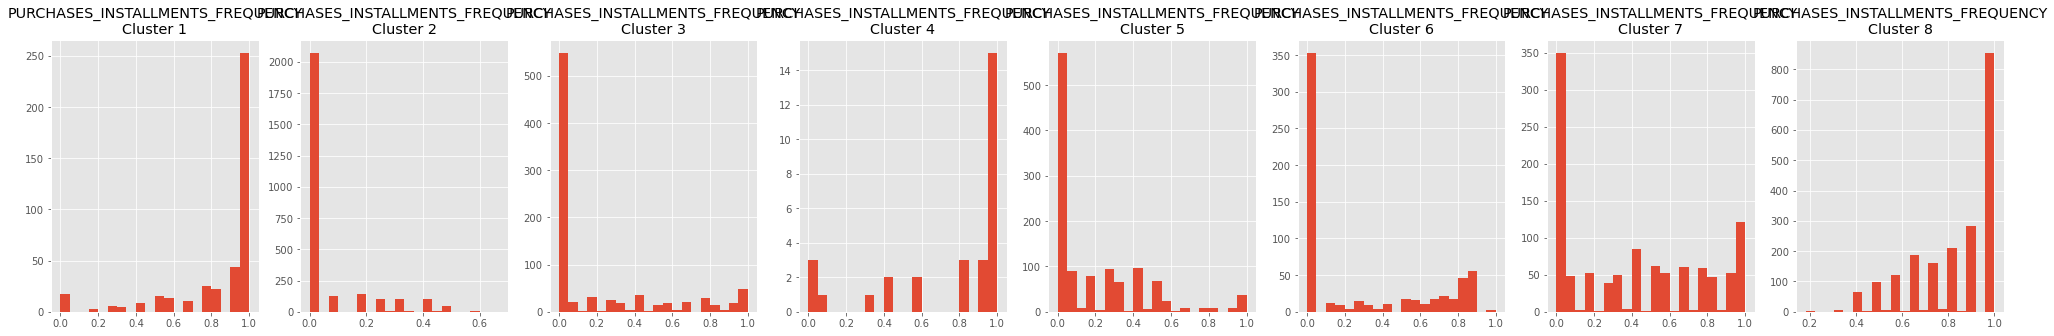

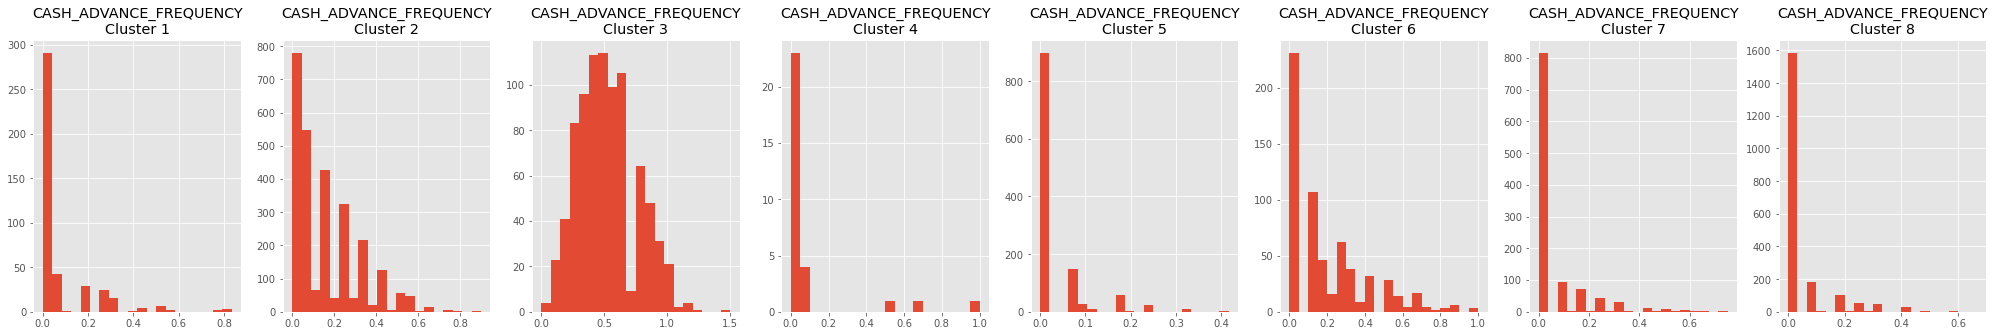

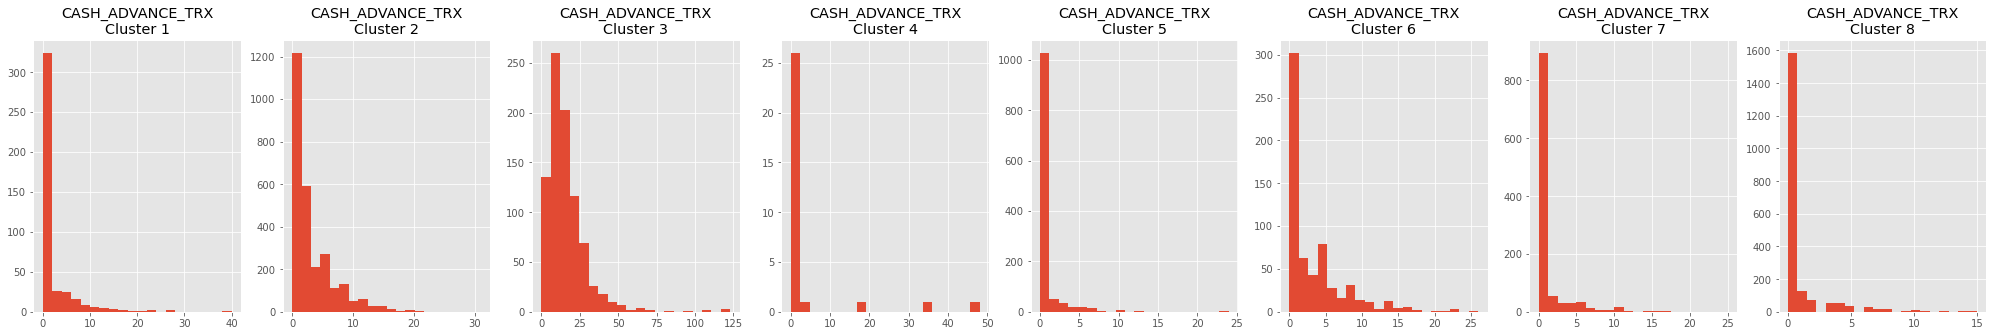

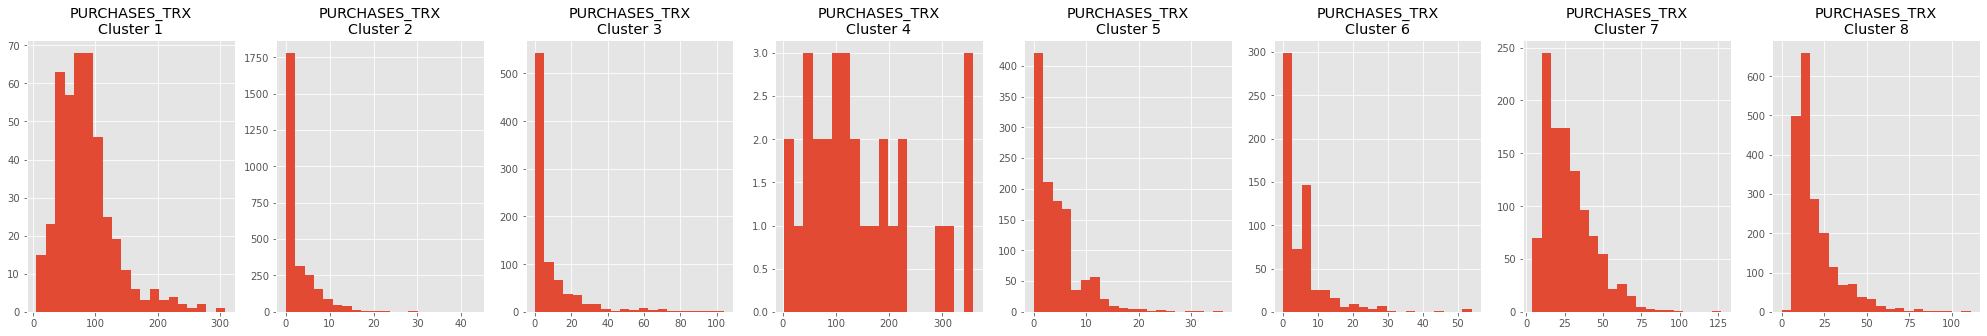

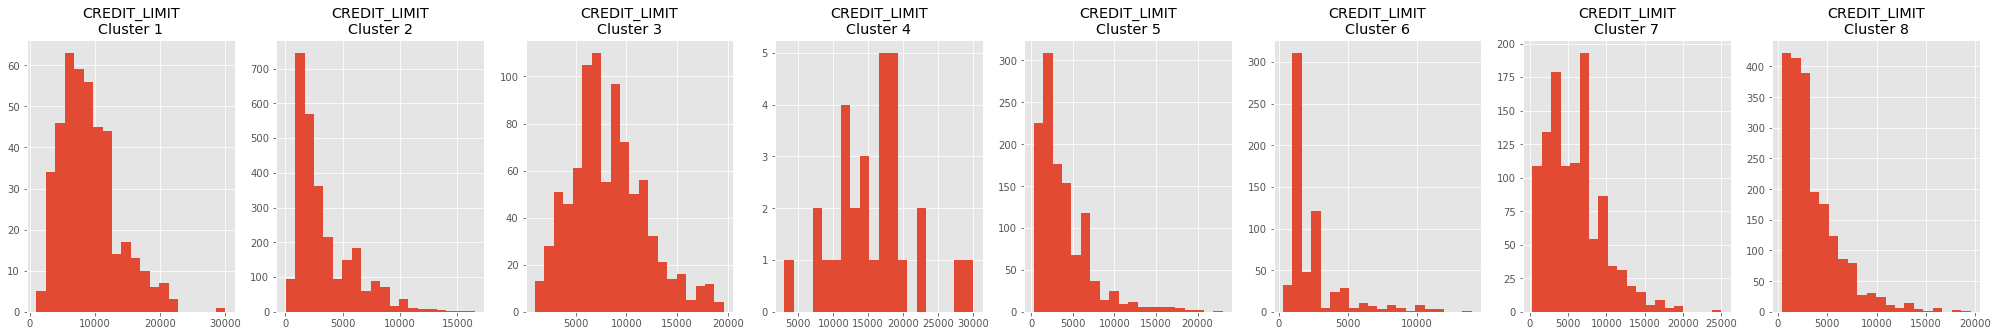

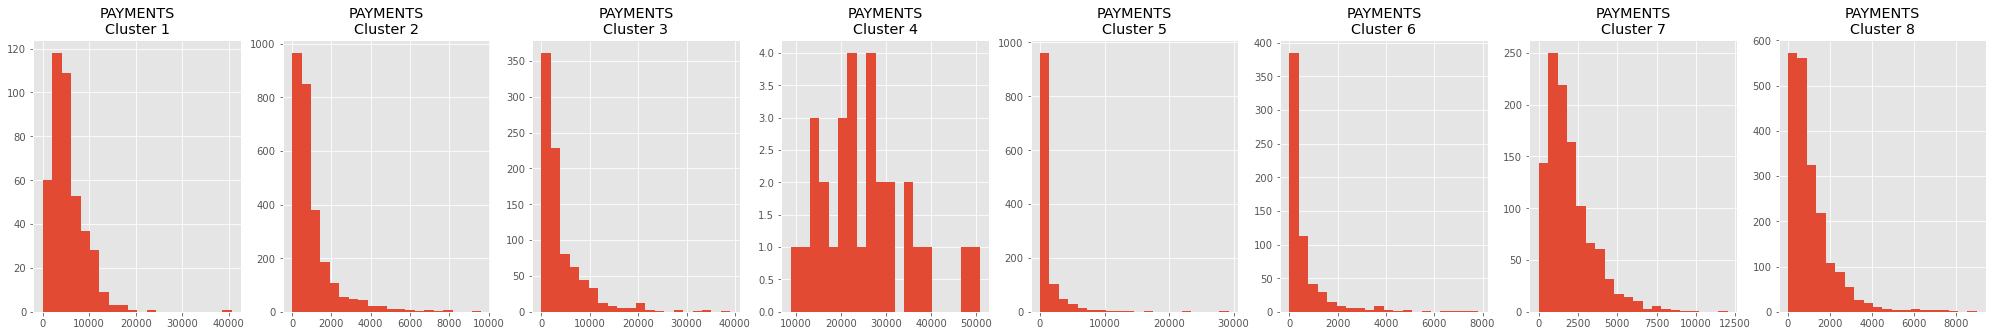

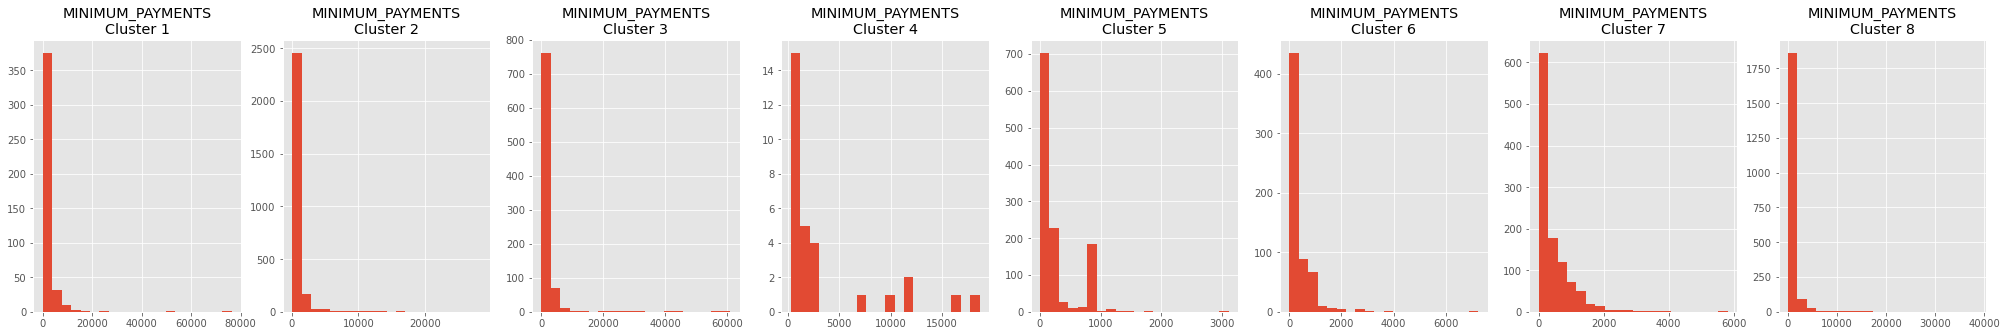

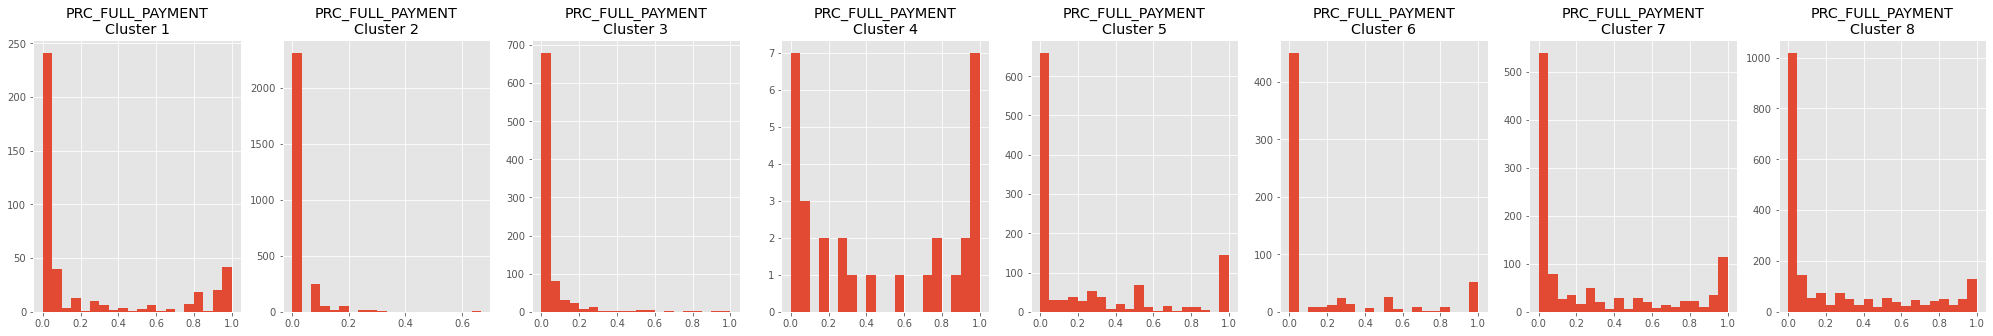

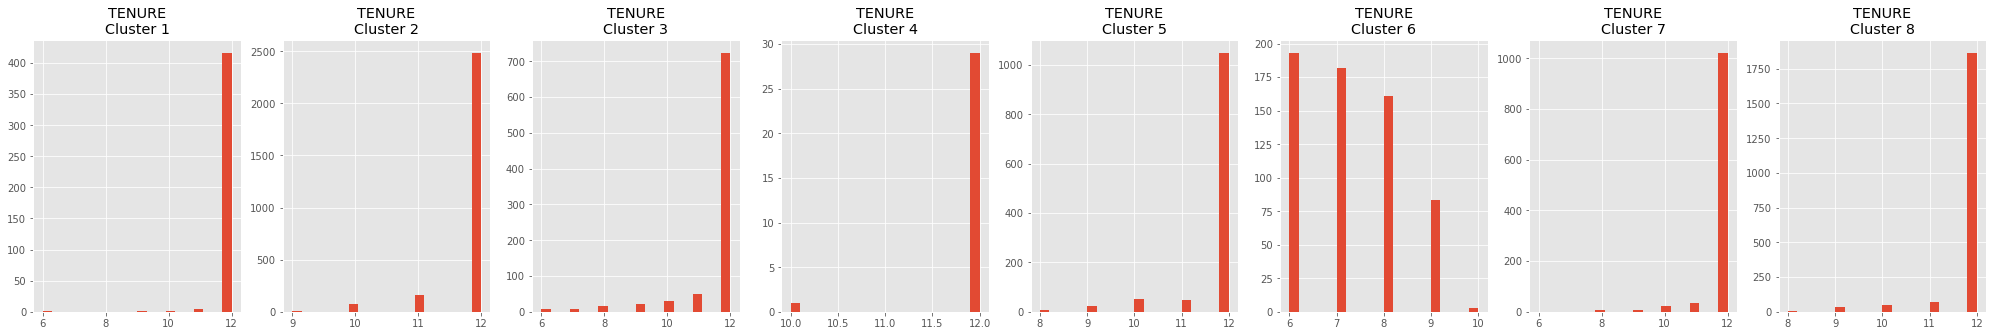

In [22]:
for i in creditcard_df.columns:
  plt.figure(figsize=(35,5))
  for j in range(8):
    plt.subplot(1,8,j+1)
    cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}\nCluster {}'.format(i, j+1))
  plt.show()

In the previous visualization we can see how each variable behaves with respect to the cluster, as well as the frequencies assigned to each cluster. for example:

* Customers with the highest balance are classified in clusters 3 and 4.
* Customers who make high purchases at a single display are in cluster 4.
* Customers who update their balance the least are in cluster 5.
* Customers in clusters 3 and 6 are the ones who ask for more cash in advance from the bank.

## Principal Component Analysis

Analyzing a data set where many variables are involved, in this case study 17, can become complicated.

The PCA or ACP in Spanish, helps us to reduce the dimensionality of the problem, this by reducing the number of variables, such that the least possible variance of the data is lost and thus the least possible information is lost.

The objective of this case study is to reduce it to 2 main components, this in order to be able to visualize the users in a scatter graph and to make it easier to analyze it.

In [23]:
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(creditcard_df_scaled)

In [24]:
pca_df = pd.DataFrame(data=principal_comp, columns=['pca_1', 'pca_2'])
pca_df.head()

,pca_1,pca_2
0,-1.682222,-1.076444
1,-1.138299,2.506500
2,0.969687,-0.383521
3,-0.873628,0.043176
4,-1.599436,-0.688578


We already have the data projected to only 2 dimensions, now we will concatenate the clusters to which each client belongs.

In [25]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df.head()

,pca_1,pca_2,cluster
0,-1.682222,-1.076444,1
1,-1.138299,2.506500,2
2,0.969687,-0.383521,6
3,-0.873628,0.043176,1
4,-1.599436,-0.688578,1


With a dataframe of only two features we can visualize the result of the K-Means algorithm more clearly.

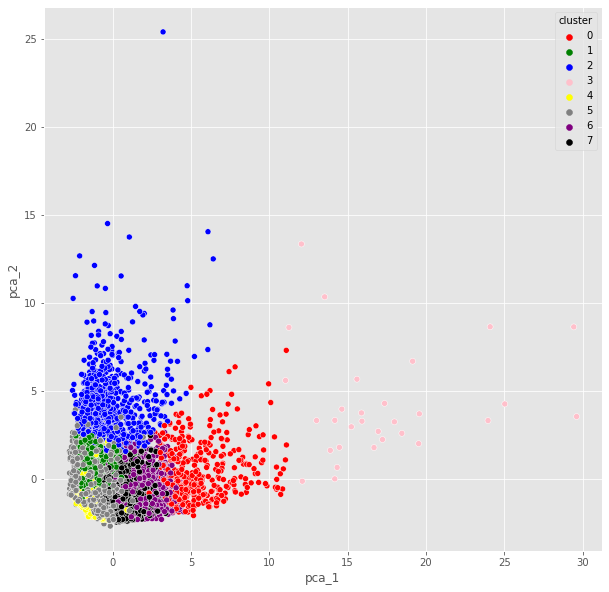

In [26]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x='pca_1', y='pca_2', hue='cluster', data=pca_df,
                     palette=['r', 'g', 'b', 'pink', 'yellow', 'gray', 'purple', 'k'])

plt.show()

As we can see, we can now visualize how the K-Means algorithm has clustered the data.

The next step is to put this information into practice and update the number k of clusters with respect to the behavior of the market.

The K-Means algorithm, being unsupervised, is difficult to predict with high accuracy the correct number of clusters, the elbow method is useful and helps to give a first impression, but it will be the behavior of the algorithm in practice that help maintain the code and make the necessary changes.

## Autoencoders

Analyzing a large number of variables to understand what is being studied can be a difficult task.

We will use the autoencoders to reduce the dimensionality of the problem and thus make it easy to analyze the variables.

In [27]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.optimizers import SGD

### Autoencoder Architecture

For this case study we will start from 17 variables (The 17 original columns of the dataset) and we will compress them to obtain 10.

In [32]:
input_df = Input(shape = (17,))
encoding_dim = 7

# We make a first reduction to 7 variables
x = Dense(encoding_dim, activation='relu')(input_df)
# We work with that reduction
x = Dense(500, activation='relu', kernel_initializer='glorot_uniform')(x)
x = Dense(500, activation='relu', kernel_initializer='glorot_uniform')(x)
x = Dense(2000, activation='relu', kernel_initializer='glorot_uniform')(x)

# We increase to 10 variables
encoded = Dense(10, activation='relu', kernel_initializer='glorot_uniform')(x)

# We work with those 10 variables in an inverse way, biasing to not have a layer of 500 neurons
x = Dense(2000, activation='relu', kernel_initializer='glorot_uniform')(encoded)
x = Dense(500, activation='relu', kernel_initializer='glorot_uniform')(x)

# We decode to obtain again the 17 variables
decoded = Dense(17, kernel_initializer='glorot_uniform')(x)

# Model to encode and decode
autoencoder = Model(input_df, decoded)
# Model only for encoding
encoder = Model(input_df, encoded)

autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [33]:
# A summary of how the model compiles the information
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 17)]              0         
_________________________________________________________________
dense_8 (Dense)              (None, 7)                 126       
_________________________________________________________________
dense_9 (Dense)              (None, 500)               4000      
_________________________________________________________________
dense_10 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_11 (Dense)             (None, 2000)              1002000   
_________________________________________________________________
dense_12 (Dense)             (None, 10)                20010     
_________________________________________________________________
dense_13 (Dense)             (None, 2000)              2200

In [41]:
# Training
hist = autoencoder.fit(creditcard_df_scaled, creditcard_df_scaled, batch_size=64, epochs=15,
                verbose=1)

Epoch 1/15
140/140 [==============================] - 10s 69ms/step - loss: 0.0588
Epoch 2/15
140/140 [==============================] - 13s 93ms/step - loss: 0.0566
Epoch 3/15
140/140 [==============================] - 8s 60ms/step - loss: 0.0501
Epoch 4/15
140/140 [==============================] - 8s 60ms/step - loss: 0.0466
Epoch 5/15
140/140 [==============================] - 6s 46ms/step - loss: 0.0447
Epoch 6/15
140/140 [==============================] - 14s 102ms/step - loss: 0.0635
Epoch 7/15
140/140 [==============================] - 13s 90ms/step - loss: 0.0523
Epoch 8/15
140/140 [==============================] - 10s 69ms/step - loss: 0.0414
Epoch 9/15
140/140 [==============================] - 13s 92ms/step - loss: 0.0369
Epoch 10/15
140/140 [==============================] - 12s 88ms/step - loss: 0.0336
Epoch 11/15
140/140 [==============================] - 8s 59ms/step - loss: 0.0342
Epoch 12/15
140/140 [==============================] - 12s 87ms/step - loss: 0.0402
Epoc

In [42]:
# Save weights of the trained autoencoder
autoencoder.save_weights('autoencoder.h5')

Now that we have the autoencoder we train, it is time to reduce the variables from 17 to 10.

We will call this new data group pred.

In [43]:
pred = encoder.predict(creditcard_df_scaled)

We now return to the K-Means algorithm, this to now apply it to the reduction of variables.

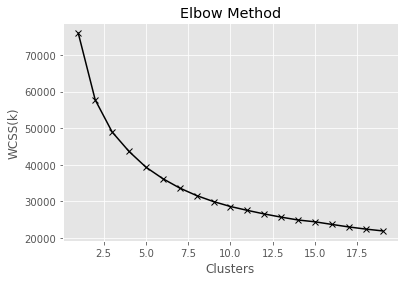

In [44]:
# Find optimal K
scores_1 = []
range_values = range(1,20)

for i in range_values:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(pred)
  scores_1.append(kmeans.inertia_)

# Visualize to choose the optimal K
plt.plot(range_values, scores_1, 'kx-')
plt.title('Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('WCSS(k)')
plt.show()

Now that we have the autoencoder we train, it is time to reduce the variables from 17 to 10.

We will call this new data group pred.

In [45]:
kmeans = KMeans(5)
kmeans.fit(pred)
labels = kmeans.labels_
y_kmeans = kmeans.fit_predict(pred)

df_cluster_ae = pd.concat([creditcard_df, pd.DataFrame({'cluster': labels})], axis=1)
df_cluster_ae.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,4
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,4
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,4


To visualize these new clusters we apply PCA again to 2 dimensions.

In [46]:
pca = PCA(n_components=2)
pca_comp2 = pca.fit_transform(pred)
pca_df = pd.DataFrame(data=pca_comp2, columns=['pca_1', 'pca_2'])

# We concatenate the calculated clusters with k-means
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis=1)
pca_df.head()

,pca_1,pca_2,cluster
0,-1.776384,-0.187245,4
1,0.192772,1.718288,2
2,-0.488257,-1.082752,4
3,-0.229187,-0.191664,1
4,-2.063338,-0.241279,4


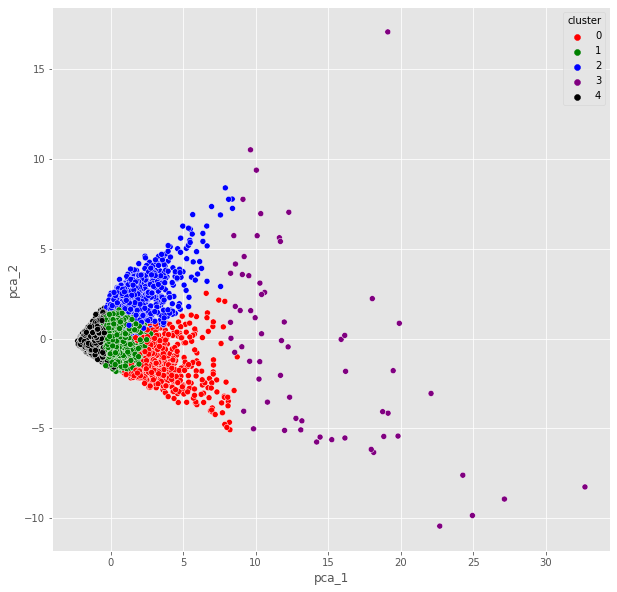

In [47]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x='pca_1', y='pca_2', hue='cluster', data=pca_df,
                     palette=['r', 'g', 'b', 'purple', 'k'])

plt.show()

The visualization makes it clear to us how the data is segmented with 5 clusters.

The next steps are to deploy the algorithm in production, observe the behavior and improve it accordingly. Remember that there is no exact formula to calculate the optimal clusters, so what remains is to improve as customers respond to different campaigns.